# ASSIGNMENT1
> Dataset: https://drive.google.com/file/d/1YDt8ZymUlnEUG0sBKN92hrWX2H2eVSj4/view (Retail Sales Dataset_exported.csv)

...open cells...

## 1. Getting summary

### 1(a) Get an overview of the dataset including data types, missing values, and summary statistics (mean, median, min, max, etc.) for numeric columns. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Load the Retail Sales Dataset_exported.csv
df_retail = pd.read_csv('Retail Sales Dataset_exported.csv')
df_retail.head()



C:\Users\Anish\AppData\Local\Temp\ipykernel_2748\3788153407.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24 00:00:00.000,CUST001,Male,34,Beauty,3.0,50.0,150.0
1,2,2023-02-27 00:00:00.000,CUST002,Female,26,Clothing,2.0,500.0,1000.0
2,3,2023-01-13 00:00:00.000,CUST003,Male,50,Electronics,1.0,30.0,30.0
3,4,2023-05-21 00:00:00.000,CUST004,Male,37,Clothing,1.0,500.0,500.0
4,5,2023-05-06 00:00:00.000,CUST005,Male,30,Beauty,2.0,50.0,100.0


In [2]:
df_retail.shape

(1013, 9)

In [3]:
# Get an overview of the dataset
overview = df_retail.info()

overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1013 non-null   int64  
 1   Date              1013 non-null   object 
 2   Customer ID       1009 non-null   object 
 3   Gender            1013 non-null   object 
 4   Age               1013 non-null   int64  
 5   Product Category  1011 non-null   object 
 6   Quantity          1005 non-null   float64
 7   Price per Unit    1000 non-null   float64
 8   Total Amount      1005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 71.4+ KB


In [4]:
#Count number of missing values in each column
df_retail.isna().sum()

Transaction ID       0
Date                 0
Customer ID          4
Gender               0
Age                  0
Product Category     2
Quantity             8
Price per Unit      13
Total Amount         8
dtype: int64

In [5]:
# Summary statistics for numeric columns
summary_stats = df_retail.describe()

summary_stats

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1013.000000,1013.000000,1005.000000,1000.000000,1005.000000
mean,507.013820,41.373149,2.519403,179.330000,457.910448
std,292.595854,13.699591,1.132142,189.938748,563.592597
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,254.000000,29.000000,1.000000,30.000000,60.000000
50%,507.000000,42.000000,3.000000,50.000000,120.000000
75%,760.000000,53.000000,4.000000,300.000000,900.000000
max,1014.000000,64.000000,4.000000,500.000000,2000.000000


## 2. Data Cleaning

### 2(a) Drop the row where Customer ID is missing

In [6]:
df_retail_cleaned = df_retail.dropna(subset=['Customer ID'])

### 2(b) Fill missing values in Product Category with the mode

In [7]:
mode_value = df_retail_cleaned['Product Category'].mode()[0]
df_retail_cleaned['Product Category'].fillna(mode_value, inplace=True)

### 2(c) Fill missing values in Quantity and Price per Unit with the median

In [8]:
median_quantity = df_retail_cleaned['Quantity'].median()
median_price = df_retail_cleaned['Price per Unit'].median()
df_retail_cleaned['Quantity'].fillna(median_quantity, inplace=True)
df_retail_cleaned['Price per Unit'].fillna(median_price, inplace=True)

### 2(d) Fill missing values in Total Amount by multiplying Quantity and Price per Unit

In [9]:
df_retail_cleaned['Total Amount'].fillna(df_retail_cleaned['Quantity'] * df_retail_cleaned['Price per Unit'], inplace=True)

### 2(e) Remove time from Date column

In [10]:
df_retail_cleaned['Date'] = pd.to_datetime(df_retail_cleaned['Date']).dt.date

In [11]:
df_retail_cleaned.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100.0


In [12]:
df_retail_cleaned.shape

(1009, 9)

In [13]:
df_retail_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 0 to 1012
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1009 non-null   int64  
 1   Date              1009 non-null   object 
 2   Customer ID       1009 non-null   object 
 3   Gender            1009 non-null   object 
 4   Age               1009 non-null   int64  
 5   Product Category  1009 non-null   object 
 6   Quantity          1009 non-null   float64
 7   Price per Unit    1009 non-null   float64
 8   Total Amount      1009 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 78.8+ KB


In [14]:
#Count number of missing values in each column
df_retail_cleaned.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [15]:
df_retail_cleaned.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
1008,1010,2023-10-15,CUST121,Female,28,Electronics,4.0,50.0,200.0
1009,1011,2023-10-03,CUST122,Male,64,Electronics,4.0,30.0,120.0
1010,1012,2023-05-15,CUST123,Female,40,Electronics,2.0,30.0,60.0
1011,1013,2023-10-27,CUST124,Male,33,Clothing,4.0,500.0,2000.0
1012,1014,2023-08-08,CUST125,Male,48,Clothing,2.0,50.0,100.0


## 3. Visualization

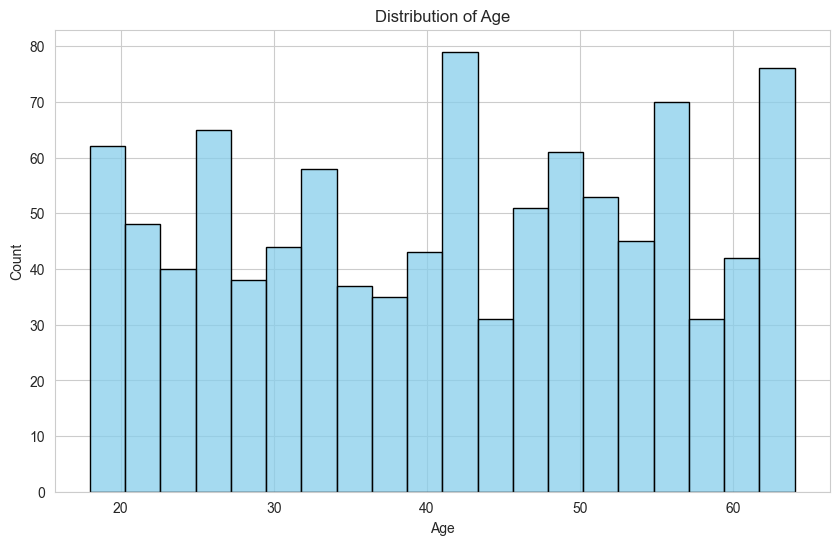

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Create a histogram of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_retail_cleaned['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

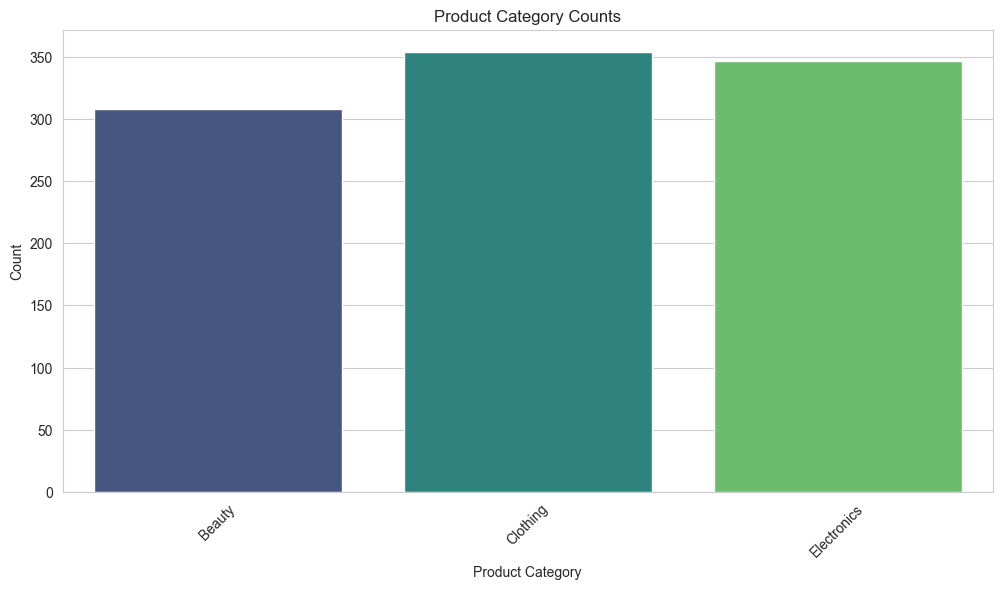

In [17]:

# Create a bar chart of Product Category counts
plt.figure(figsize=(12, 6))
sns.countplot(data=df_retail_cleaned, x='Product Category', palette='viridis')
plt.title('Product Category Counts')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


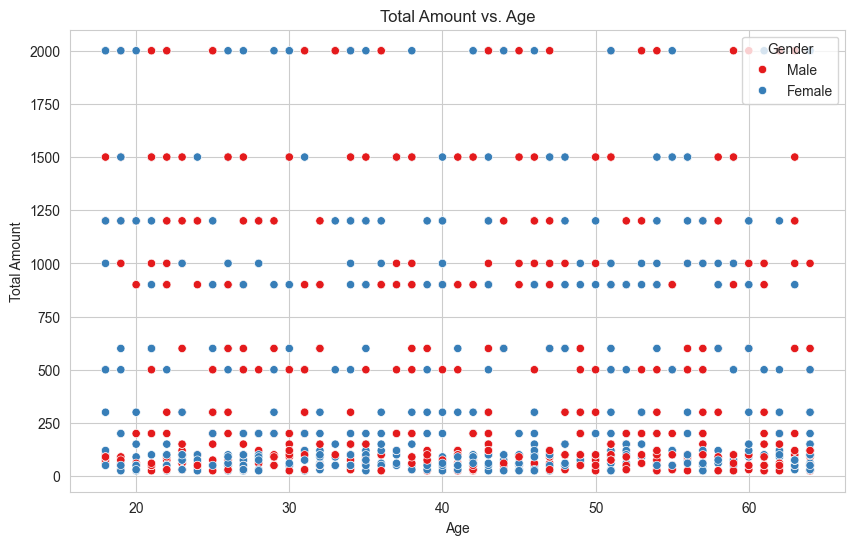

In [18]:
# Create a scatter plot of Total Amount vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_retail_cleaned, x='Age', y='Total Amount', hue='Gender', palette='Set1')
plt.title('Total Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender', loc='upper right')
plt.show()

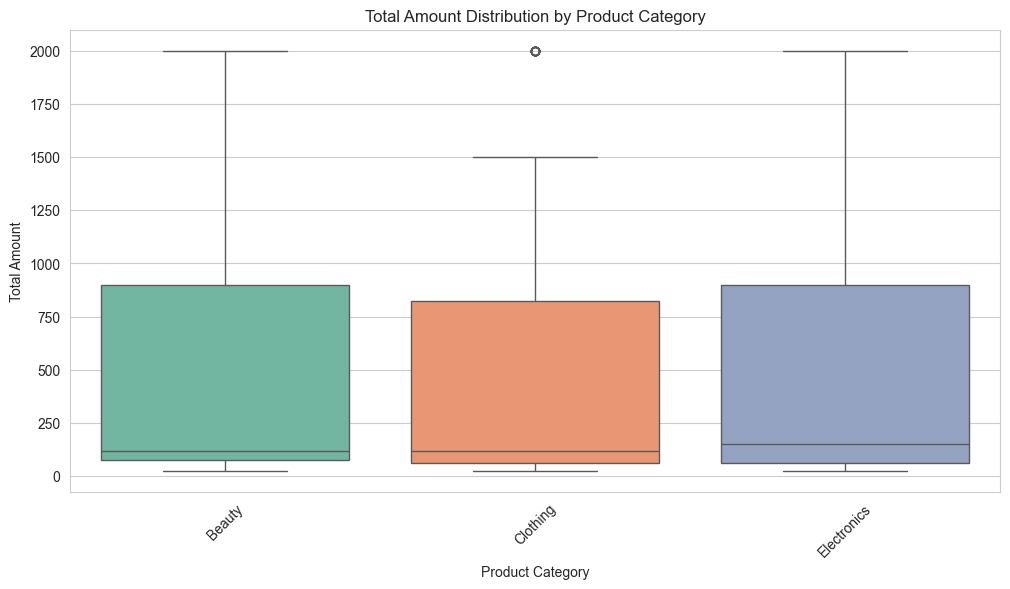

In [19]:
# Total Amount Distribution by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_retail_cleaned, x='Product Category', y='Total Amount', palette='Set2')
plt.title('Total Amount Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

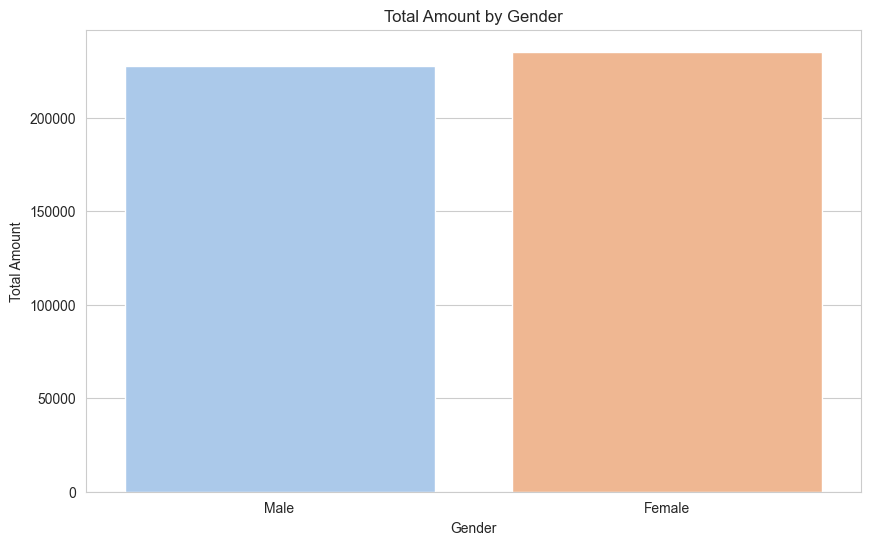

In [20]:
#Total Amount by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df_retail_cleaned, x='Gender', y='Total Amount', estimator=sum, ci=None, palette='pastel')
plt.title('Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

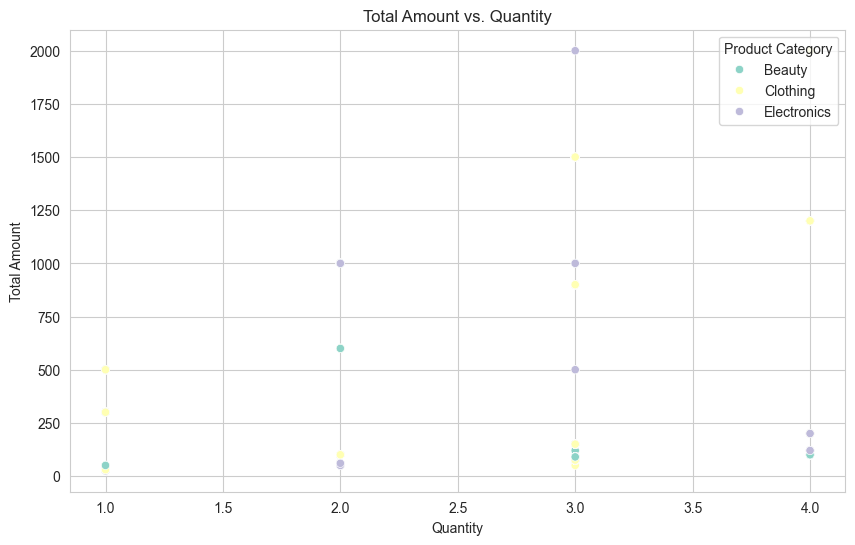

In [21]:
#Total Amount vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_retail_cleaned, x='Quantity', y='Total Amount', hue='Product Category', palette='Set3')
plt.title('Total Amount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', loc='upper right')
plt.show()